In [1]:
#load cancer data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target #unsupervised learning, target is not needed


In [2]:
#rescale data
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler().fit(X).transform(X)


In [3]:
print(X_scale.shape)

(569, 30)


In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_scale)
X_pca = pca.transform(X_scale)


In [5]:
print(X_pca.shape)

(569, 2)


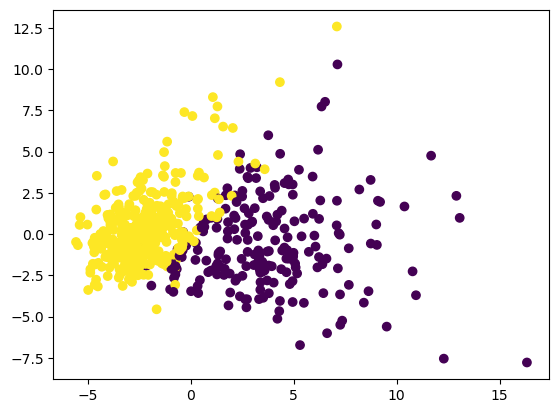

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0], X_pca[:,1], c=y,)

In [8]:
#pca feature extraction
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=100)


In [9]:
print(people.keys())

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


In [10]:
print(people.data.shape)

(1140, 2914)


In [11]:
print(people.images.shape)

(1140, 62, 47)


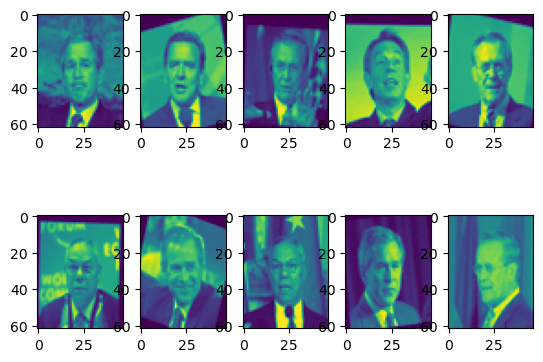

In [12]:
fig, axes = plt.subplots(2,5)
i = 0
for ax in axes.ravel():
    ax.imshow(people.images[i])
    i+=1

In [13]:
import numpy as np
count = np.bincount(people.target)

In [14]:
print(count)

[236 121 530 109 144]


In [15]:
print(people.target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [16]:
X = people.data
X = X/255
y = people.target #we dont need 


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30, whiten=True, random_state=0)
pca.fit(X)


PCA(n_components=30, random_state=0, whiten=True)

In [18]:
pca.components_.shape

(30, 2914)

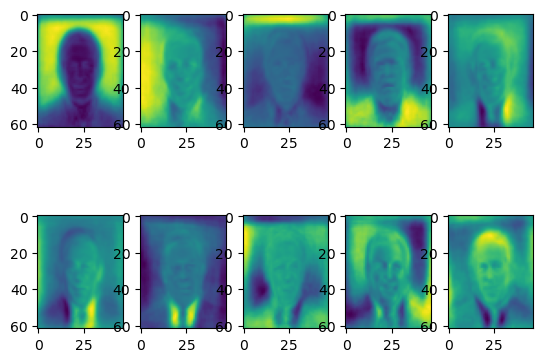

In [19]:
fig, axes = plt.subplots(2,5)
i =0
for ax in axes.ravel():
    ax.imshow(pca.components_[i].reshape(62,47))
    i+=1

In [20]:
pca

PCA(n_components=30, random_state=0, whiten=True)

In [21]:
X_pca = pca.transform(X)

In [22]:
X.shape

(1140, 2914)

In [23]:
X_pca.shape

(1140, 30)

In [24]:
#load digits dataset
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [25]:
X=digits.data
y = digits.target

In [26]:
print(X.shape)

(1797, 64)


C:\Users\khadk\anaconda3\envs\machineLearning_Spring_2023\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\khadk\anaconda3\envs\machineLearning_Spring_2023\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


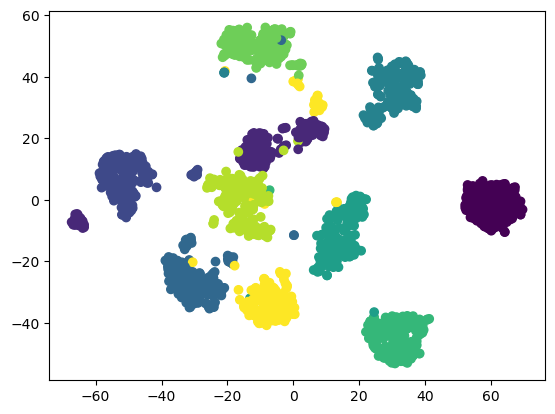

In [27]:
from sklearn.manifold import TSNE
ts = TSNE(n_components=2)
X_ts = ts.fit_transform(X)
plt.scatter(X_ts[:,0], X_ts[:,1], c=y)